# Metropolis Algorithm

In [16]:
import numpy as np
from math import log, sqrt
import scipy.stats
import matplotlib.pyplot as plt

In [10]:
def log_likelihood(n1, n2, a, W):
    # this function takes a numpy array for n1, n2, and the accuracy (0/1), whether they answerd correctly
    # as well as W, the hypothesis
    # and returns the *log* likelihood of the responses, log P(acc | n1, n2, W)

    assert(len(n1) == len(n2) == len(a))

    p = 1.0-scipy.stats.norm.cdf(0, loc=np.abs(n1-n2), scale=W*np.sqrt(n1**2 + n2**2)) # the probability of answering correctly
    return np.sum(np.where(a, np.log(p), np.log(1.0-p)))

## 1
[5pts] We will implement functions that compute the logarithm of the prior and the logarithm posterior, as opposed to the unlogged versions. Explain why in 1-2 sentences.

** The numbers get too small, so taking a log will give us a better representation that is more computable, also that will be not rounded off by the computer. Also, we can use addition and subtraction to match all the multiplication and division operations**

## 2

[5pts] Explain in a 1-2 sentences why the form of the acceptance ratio P(W'|D)/P(W|D) is convenient for us – that is, why it saves us from doing an integral.

** Use this form of acceptance ratio, we can cancel out the integral that is usually used to calculate the ratio, which usually requires summing over all values. In this way, we get a very functional analog of the acceptance ratio. **

## 3

[5pts] Write functions to compute something proportional to the log prior and log posterior in this model. You will prevent later frustration by ensuring that your prior correctly handles cases when W<0 (what should it return?).

In [17]:
# Return true if w1 > w2, if 
def log_prior(w):
    if w < 0:
        return 0
    else:
        return -w

def log_post(n1, n2, a, W):
    # P(D|H) P(H)
    # P(D|H) * log_prior
    return log_likelihood(n1, n2, a, W) + log_prior(W)

def proportion(n1, n2, a, w1, w2):
    return log_post(n1, n2, a, w2) - log_post(n1, n2, a, w1) 

## 4

Plots are shown first below, then the code used to implement the plots are shown below that.

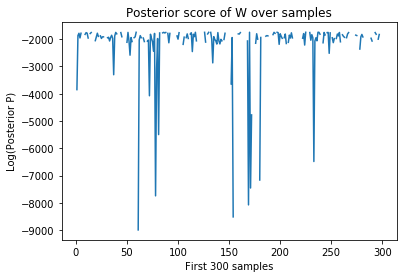

In [57]:
plt.plot(w_posteriors)
plt.xlabel("First 300 samples")
plt.ylabel("Log(Posterior P)")
plt.title("Posterior score of W over samples")
plt.show()

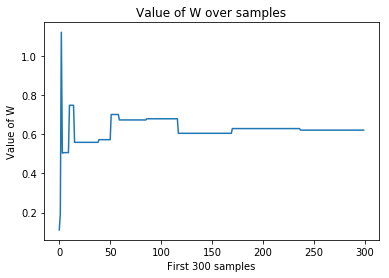

In [59]:
plt.plot(w_all)
plt.xlabel("First 300 samples")
plt.ylabel("Value of W")
plt.title("Value of W over samples")
plt.show()

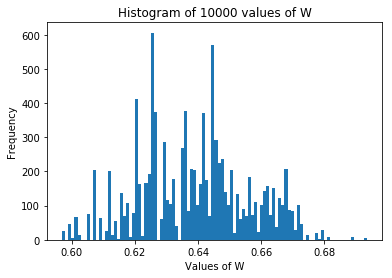

In [62]:
plt.hist(w_all1, bins=100)
plt.xlabel("Values of W")
plt.ylabel("Frequency")
plt.title("Histogram of 10000 values of W")
plt.show()

In [83]:
#Load data from csv
data = np.loadtxt(open("data.csv", "rb"), delimiter=",", skiprows=1)

In [24]:
# n1, n2, a = list(), list(), list()
# for arr in data:
#     n1.append(arr[1])
#     n2.append(arr[2])
#     a.append(arr[0])
n1 = data[:,1]
n2 = data[:,2]
a = data[:,0]

In [56]:
w_posteriors = np.ones(300)
w_all = np.ones(300)
w = np.random.random()

for i in range(300):
    w_prime = w + np.random.normal(0, 1)
    w_posteriors[i] = log_post(n1, n2, a, w_prime)
    p = proportion(n1, n2, a, w, w_prime)
    if p > np.log(1):
        w = w_prime
    elif np.random.random() < np.exp(p):
        w = w_prime
    w_all[i] = w

/Users/catherinewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [60]:
#Finish burning 700 more samples to reach 1000 burn-in
for i in range(700):
    w_prime = w + np.random.normal(0, 1)
    p = proportion(n1, n2, a, w, w_prime)
    if p > np.log(1):
        w = w_prime
    elif np.random.random() < np.exp(p):
        w = w_prime

/Users/catherinewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [61]:
# Take the 10000 samples for actual data
w_all1 = np.zeros(10000)
for i in range(10000):
    w_prime = w + np.random.normal(0, 1)
    p = proportion(n1, n2, a, w, w_prime)
    if p > np.log(1):
        w = w_prime
        
    elif np.random.random() < np.exp(p):
        w = w_prime
        
    w_all1[i] = w

/Users/catherinewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


## 5
[15pts] Use your sampler to determine the probability that W is in the interval [0.2,0.3]. What is that probability?

The below code shows that there is a 0% chance that W is in the interval [0.2, 0.3].

In [63]:
interval = [0.2, 0.3]

In [64]:
prop = 0
for val in w_all1:
    if val < 0.2 and val > 0.3:
        prop += 1
        
print(prop/10000)

0.0


## 6 Extra credit

b) **Measure of goodness: the amount of variation seen in the x value as well as the size of the posterior probability**

In the below visualization, you'll see both graphs for the posterior probability as well as the value of w in the last 100 trials. They are plotted on the same graph for ease of visualization. Essentially, the graphs show how the run for 200 steps is much more accurate than that for 100 steps, concatenated, as the variation of the w value varies much more throughout the graph and the posterior probability (all in orange) is much smaller than that of the 200 list, because the choice is uncertain.

a)

Orange line is concatenation, blue line is 200 steps. (green is 200 steps in the last graphic).

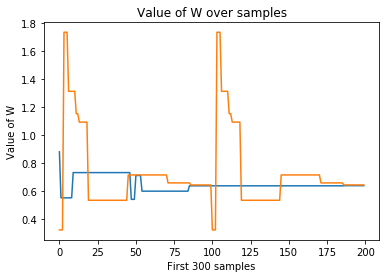

In [81]:
plt.plot(w_all)
plt.plot(w_all2)
plt.xlabel("First 300 samples")
plt.ylabel("Value of W")
plt.title("Value of W over samples")
plt.show()

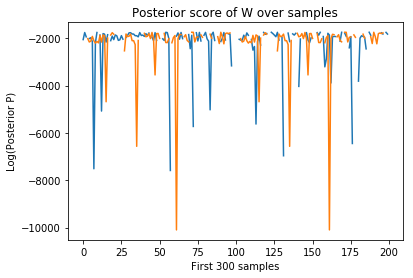

In [82]:
plt.plot(w_posteriors)
plt.plot(w_pos)
plt.xlabel("First 300 samples")
plt.ylabel("Log(Posterior P)")
plt.title("Posterior score of W over samples")
plt.show()

In [77]:
w_posteriors = np.ones(200)
w_all = np.ones(200)
w = np.random.random()

for i in range(200):
    w_prime = w + np.random.normal(0, 1)
    w_posteriors[i] = log_post(n1, n2, a, w_prime)
    p = proportion(n1, n2, a, w, w_prime)
    if p > np.log(1):
        w = w_prime
    elif np.random.random() < np.exp(p):
        w = w_prime
    w_all[i] = w

/Users/catherinewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [78]:
w_posteriors1 = np.ones(100)
w_all1 = np.ones(100)
w1 = np.random.random()

for i in range(100):
    w_prime1 = w1 + np.random.normal(0, 1)
    w_posteriors1[i] = log_post(n1, n2, a, w_prime1)
    p = proportion(n1, n2, a, w1, w_prime1)
    if p > np.log(1):
        w1 = w_prime1
    elif np.random.random() < np.exp(p):
        w1 = w_prime1
    w_all1[i] = w1

/Users/catherinewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [79]:
w_all2 = np.append(w_all1, w_all1)

In [80]:
w_pos = np.append(w_posteriors1, w_posteriors1)